In [1]:
import numpy as np
import itertools
from algoritmo_genetico import *
import matplotlib.pyplot as plt

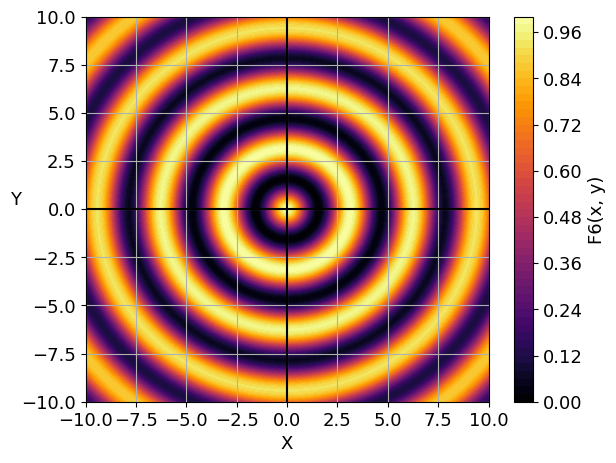

In [2]:
def schaffer_f6(x, y):
    numerador = np.sin(np.sqrt(x**2 + y**2))**2 - 0.5
    denominador = (1 + 0.001 * (x**2 + y**2))**2
    return 0.5 - numerador / denominador

# Criando uma grade de valores para x e y
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = schaffer_f6(X, Y)

# Plotando o gráfico de contorno da função Schaffer’s F6
plt.figure(figsize=(6.5, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='inferno')
colorbar = plt.colorbar(contour, label='F6(x, y)')
colorbar.ax.tick_params(labelsize=13)
colorbar.set_label('F6(x, y)', fontsize=13)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.axvline(0, 0, color='black')
plt.axhline(0, 0, color='black')

# Rótulos dos eixos x e y
plt.xlabel('X', fontsize=13)
plt.ylabel('Y', fontsize=13, rotation=0)
plt.grid(True)
plt.savefig("images/contorno.png")
plt.show()


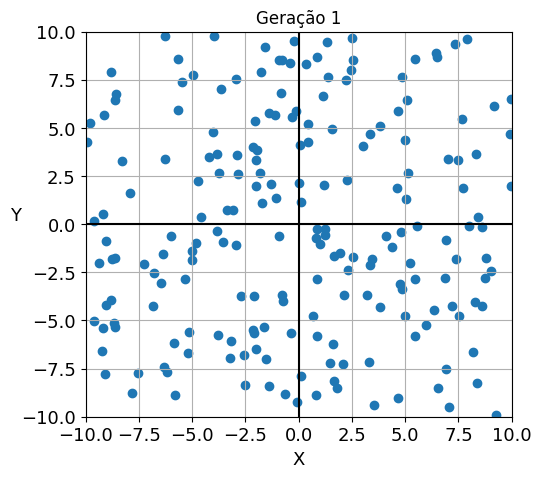

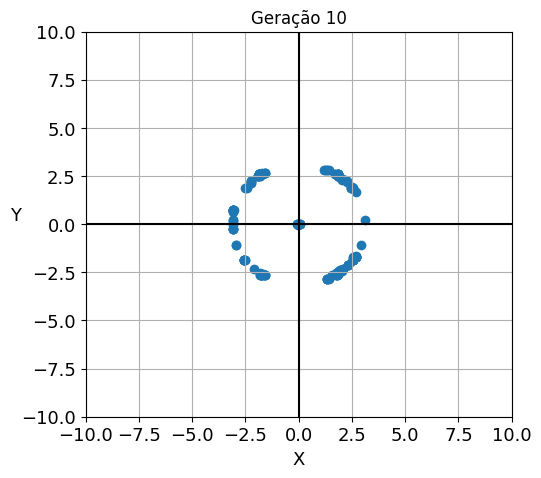

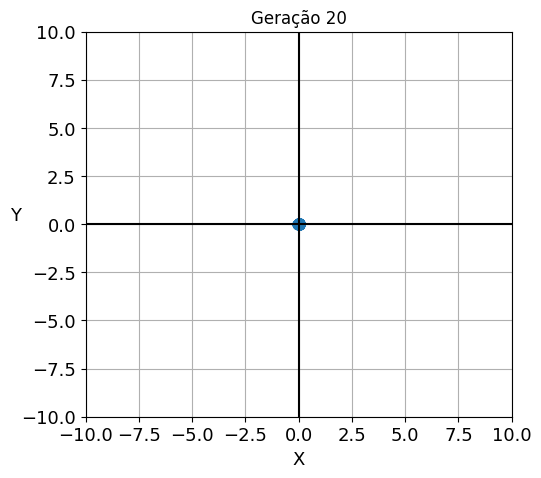

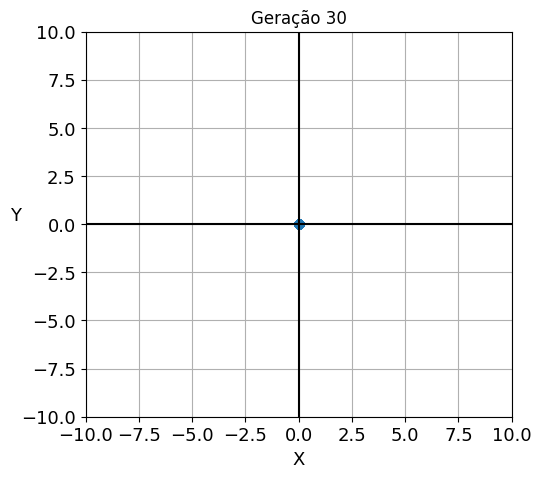

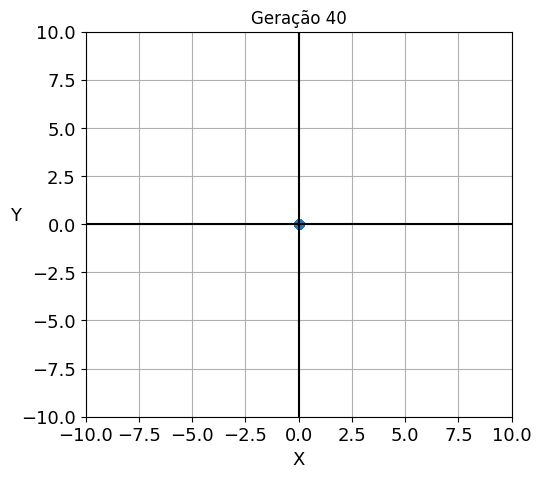

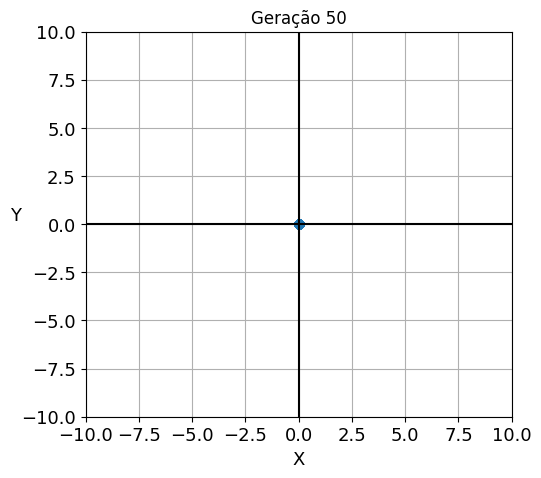

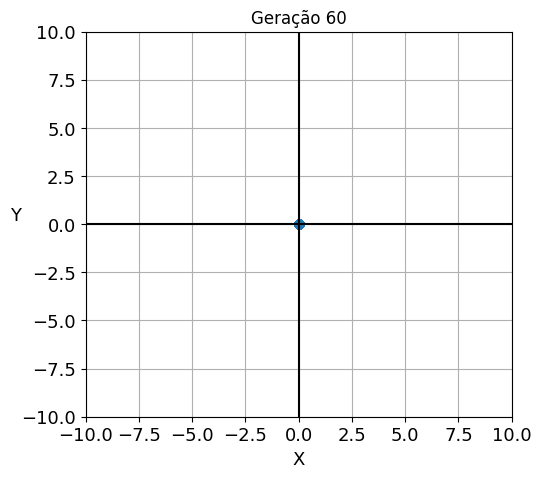

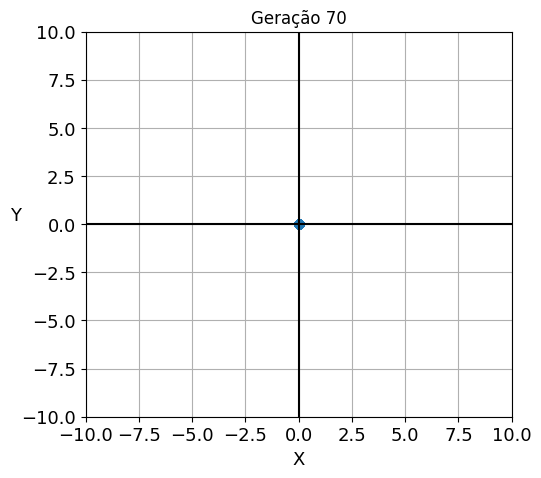

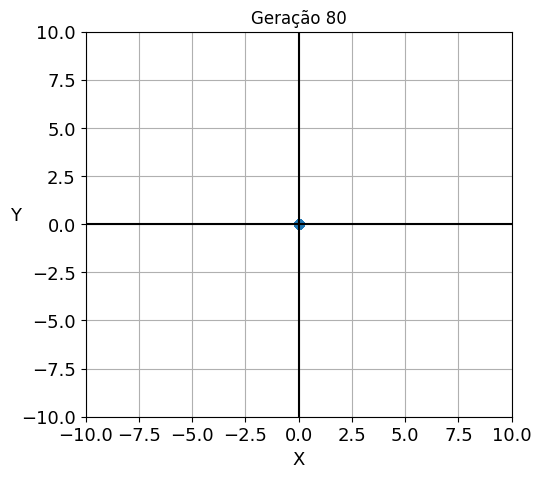

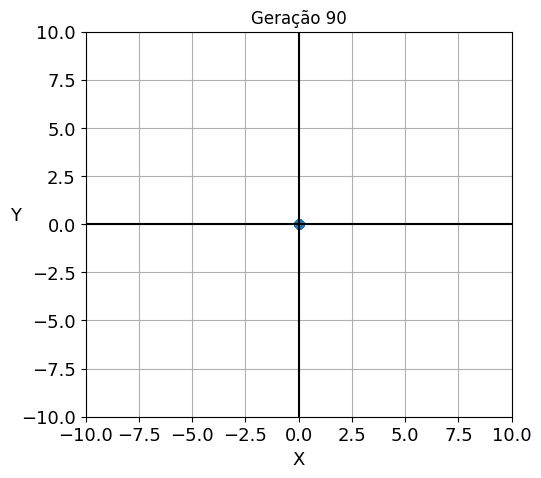

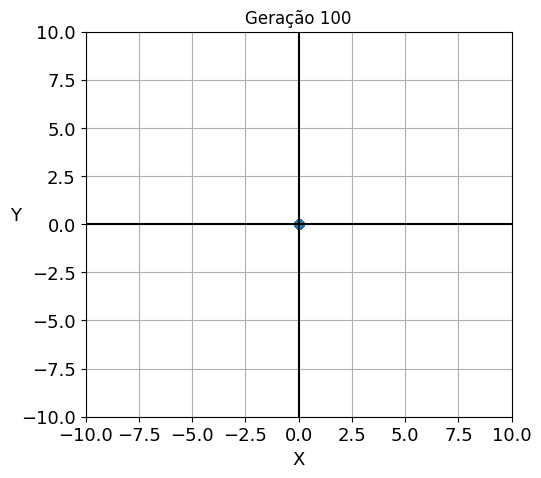

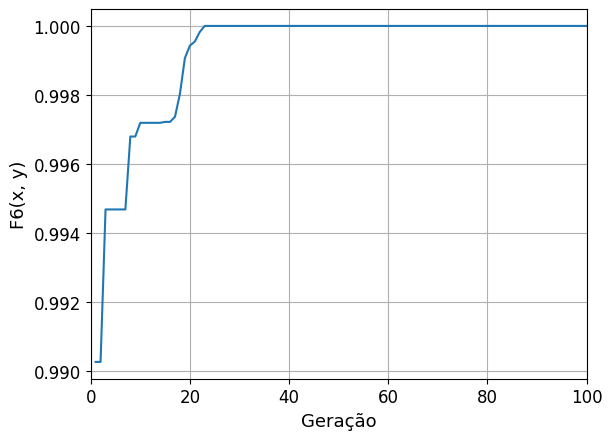

In [2]:
# Parâmetros iniciais
n_individuos = 200
geracoes = 100
dom = np.linspace(-10, 10, 200001)
np.random.seed(0)
x = np.random.choice(dom, n_individuos)
y = np.random.choice(dom, n_individuos)
max_fitness = []

# População inicial e cálculo do fitness
population = representacao(x, y)
fitness_population = fitness(population)
max_fitness.append(max(fitness_population))

plot_x_y(population, 1)
# Loop principal das gerações
for n in range(2, geracoes+1):
    # Lista para armazenar a população filha gerada
    population_filha = []

    # Gerando população filha até alcançar o tamanho da população original
    while len(population_filha) != len(population):
        pai1, pai2 = sorteio(population, fitness_population)
        filho = cruzamento(pai1, pai2)
        if filho:
            filho = mutacao(filho)
            population_filha.append(filho)

    # Calculando o fitness da população filha
    fitness_population_filha = fitness(population_filha)

    # Selecionando os indivíduos mais aptos da população combinada
    population = selecao_aptos(population, fitness_population, 
                               population_filha, fitness_population_filha)
    fitness_population = fitness(population)

    # Armazenando o maior fitness desta geração
    max_fitness.append(max(fitness_population))
    
    # Plotando a distribuição de x e y a cada 10 gerações
    if n % 10 == 0:
        plot_x_y(population, n)

# Plotando o gráfico do maior fitness ao longo das gerações
rounds = np.linspace(1, geracoes, geracoes)
plt.plot(rounds, max_fitness)
plt.xlabel('Geração', fontsize=13)
plt.ylabel('F6(x, y)', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, geracoes)
plt.grid(True)
plt.savefig('images/melhor_individuo.png', bbox_inches='tight')
plt.show()